<a href="https://colab.research.google.com/github/MasonG702/1221-Dark-Matter/blob/main/transit_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

In [2]:
# upload file
from google.colab import files
uploaded = files.upload()

Saving HD209458b.txt to HD209458b.txt


In [3]:
# read the data
dat = astropy.io.ascii.read("HD209458b.txt")

Text(0, 0.5, 'Normalize Flux')

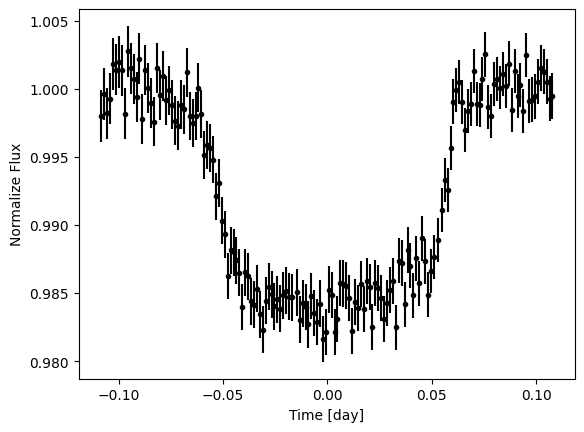

In [4]:
# plot the data and include vertical error bars
time = dat["col1"] - np.median(dat["col1"])
rel_mag = dat["col2"]
flux = 2.514**(1.0 - rel_mag)
err = dat["col3"]
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")

In [6]:
# define best-fit model as "box model" and specify the parameters
def box_model(t, center_time, duration, depth, delta_flux):
  f = np.zeros(np.shape(t))
  ind = np.where(np.abs(t - center_time) < (duration / 2.0))
  f[ind] = 1.0 + delta_flux - depth
  ind = np.where(np.abs(t - center_time) >= (duration / 2.0))
  f[ind] = 1.0 + delta_flux
  return(f)

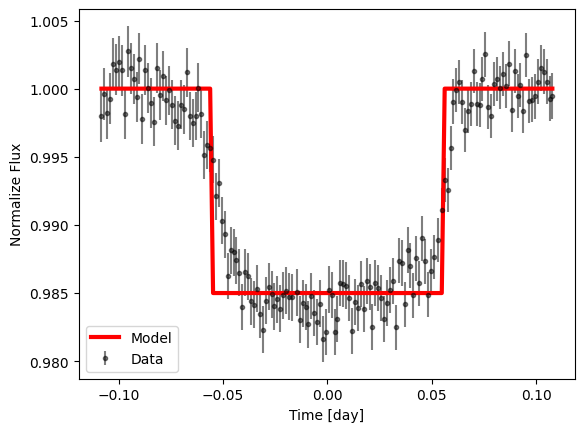

In [11]:
# plot the best-fit model and adjust parameters manually to make the model "look good"
center_time, duration, depth, delta_flux = 0.0, 0.11, 0.015, 0.0
model = box_model(time, center_time, duration, depth, delta_flux)
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none", alpha=0.5, label="Data")
plt.plot(time, model, color="red", linewidth=3.0, label="Model")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();

In [22]:
# define reduced chi squared variable and calculate based on known equation
def calc_reduced_Chi2(O, C, err, n, m):
  Chi2 = np.sum((O - C)**2 / err**2)
  reduced_Chi2 = Chi2 / (n - m)
  return(reduced_Chi2)

In [23]:
# show reduced Chi2 value
print("reduced Chi2 = ", calc_reduced_Chi2(flux, model, err, len(time), 4.0))

reduced Chi2 =  1.9189961992668991


In [24]:
# repeat the same process as above, only using a trapezoid model instead of box to more accurately represent the data
def trapezoid_model(t, center_time, duration, depth, delta_flux, ingress):
  f = np.zeros(np.shape(t))
  ind = np.where(np.abs(t - center_time) < (duration / 2.0))
  f[ind] = 1.0 + delta_flux - depth
  ind = np.where(np.abs(t - center_time) >= (duration / 2.0 + ingress))
  f[ind] = 1.0 + delta_flux
  ind = np.where((np.abs(t - center_time) <= (duration / 2.0 + ingress)) & (np.abs(t - center_time) > (duration / 2.0)))
  for i in ind[0]:
    delta_t = np.abs(np.abs(t[i] - center_time) - (duration / 2.0))
    f[i] = depth / ingress * delta_t + 1.0 + delta_flux - depth
  return(f)

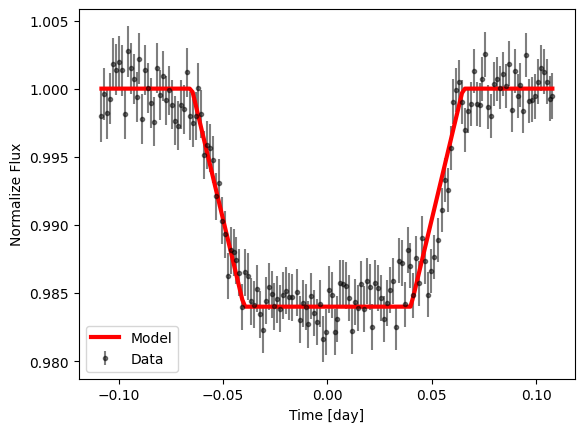

In [32]:
# define same variables as before, manually adjust parameters to make the model "look good"
center_time, duration, depth, delta_flux, ingress = 0.0, 0.08, 0.016, 0.0, 0.025
model = trapezoid_model(time, center_time, duration, depth, delta_flux, ingress)
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none", alpha=0.5, label="Data")
plt.plot(time, model, color="red", linewidth=3.0, label="Model")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();

In [34]:
# reduced Chi2 calculation of trapezoid model with manual inputs
def calc_reduced_Chi2_trapezoid(O, C, err, n, m):
  Chi2_trapezoid = np.sum((O - C)**2 / err**2)
  reduced_Chi2_trapezoid = Chi2_trapezoid / (n - m)
  return(reduced_Chi2_trapezoid)

print("reduced Chi2_trapezoid = ", calc_reduced_Chi2_trapezoid(flux, model, err, len(time), 4.0))

reduced Chi2_trapezoid =  0.8873318520323217


In [ ]:
# it is possible to adjust parameters automatically in order to produce smallest possible Chi2 value using emcee module and likelihood functions. there are simple, powerful tools within python for intermediate data analysis tasks.